# CS 584 MP1

## @Guangji Bai

### Overall objectives of the visualization

1.	Quickly grab the general structure of the graph (especially for a large graph)
2.  Help us have a prior knowledge of the graph's basic properties
3.	Find the subgraph's pattern in the original graph

### Data resources

I will use the CiteSeer dataset in this project. CiteSeer is a citation network, where each node represents a document or paper and each edge represents one citation between two papers. There are more than 3000 nodes and 4000 edges in CiteSeer and each node has a given label. There are many different versions of the data under the same name “CiteSeer”, and the one I used can be achieved via this link: http://networkrepository.com/citeseer.php.

In [18]:
import networkx as nx
from igraph import *
import matplotlib.pyplot as plt
import numpy as np

I will be using the "igraph" package for this project due to its powerful visualization ability in graph data.

### Data preprocessing and graph construction procedures

In [19]:
G = nx.Graph()

In [20]:
edges = []

with open("citeseer.edges", "r") as edges_file:
    line = edges_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")
        edges.append(((int(strings[0])-1), (int(strings[1])-1)))
        
        line = edges_file.readline()

In [21]:
G.add_edges_from(edges)

### Components of the constructed graphs

Each node: a scientific publication  
Each edge: a citation  
Node label: six categories, including Artificial Intelligence, Machine Learning, Agents, Database, Human Computer Interaction, Information Retrieval  
Node attibutes: None  
Edge weights: None  

### Analyses of the graphs (Basic properties)

In [23]:
print("The number of vertices:", len(G))
print("The number of edges:", G.number_of_edges())

The number of vertices: 3264
The number of edges: 4536


In [24]:
temp_n = len(G)
temp_e = G.number_of_edges()
print("Graph density:", 2*temp_e/(temp_n*(temp_n-1)))

Graph density: 0.000851796434172811


Here you can see that CiteSeer is a very spase network, since the density is small.

In [34]:
# Clustering coefficient of all nodes
clust_coefficients = nx.clustering(G)

ccs = nx.clustering(G)
avg_clust = sum(ccs.values()) / len(ccs)
print("The average clustering coefficient:", avg_clust)

The average clustering coefficient: 0.14465096964857113


This result coincides with the previous lecture that in realworld graph data the clustering coefficient is relatively high.

In [26]:
g = Graph()

n_vertices = 3264
g.add_vertices(n_vertices)

edges = []

with open("citeseer.edges", "r") as edges_file:
    line = edges_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")

        edges.append(((int(strings[0])-1), (int(strings[1])-1)))
        line = edges_file.readline()

g.add_edges(edges)  # Now I have created the graph CiteSeer with all nodes and edge

In [27]:
degrees = []
degree_sum = 0

for n in range(n_vertices):
    neighbours = g.neighbors(n, mode='ALL')
    degree_sum += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", degree_sum/n_vertices)
print("Maximal degree:", max(degrees))

Average degree: 2.7794117647058822
Maximal degree: 99


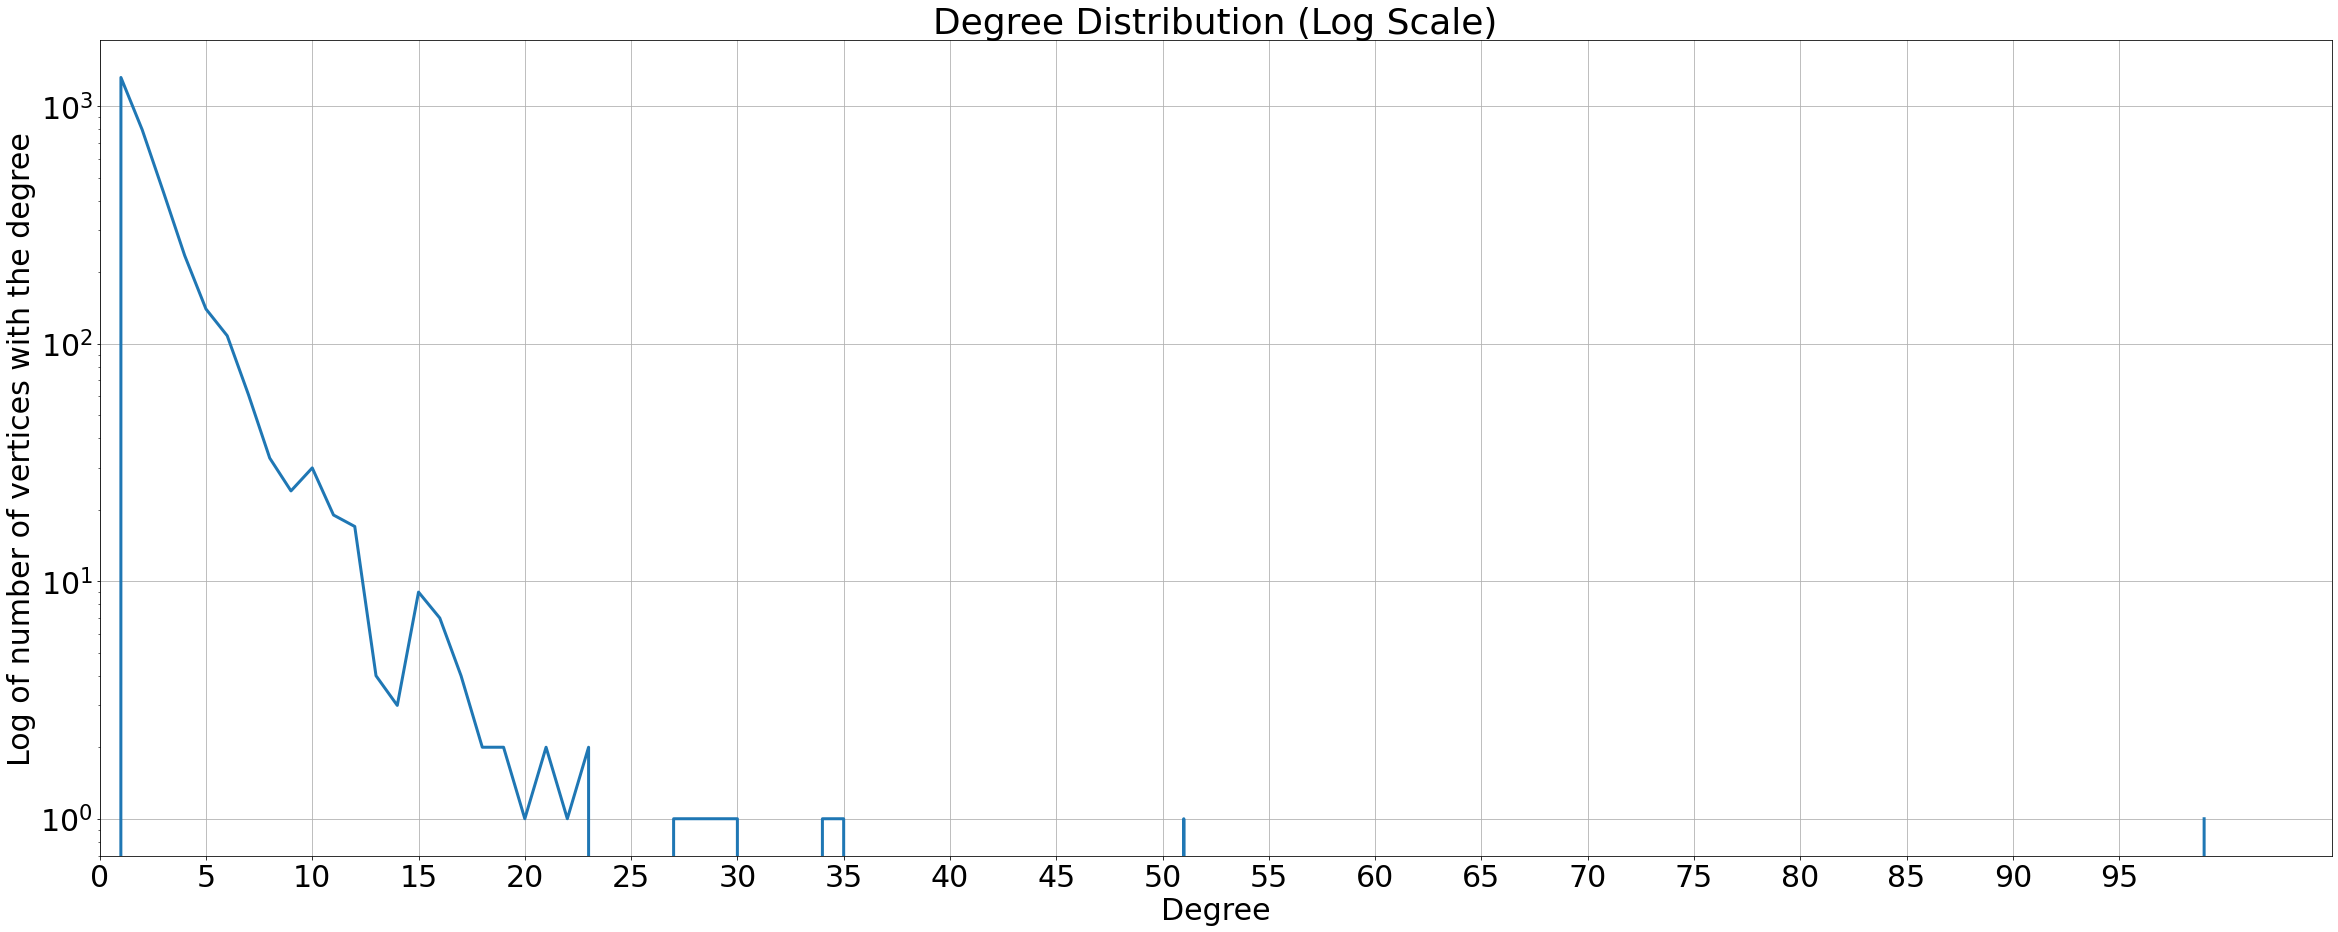

In [28]:
x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(100)]

for i in degrees:
    degree_counts[i] += 1

plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,15))
plt.plot(x, degree_counts, linewidth=3.0)
plt.yscale('log')
plt.ylabel('Log of number of vertices with the degree')
plt.xlabel('Degree')
plt.title('Degree Distribution (Log Scale)')

plt.xlim(0,105)
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.grid(True)
plt.savefig('degree_distribution.png')
plt.show()

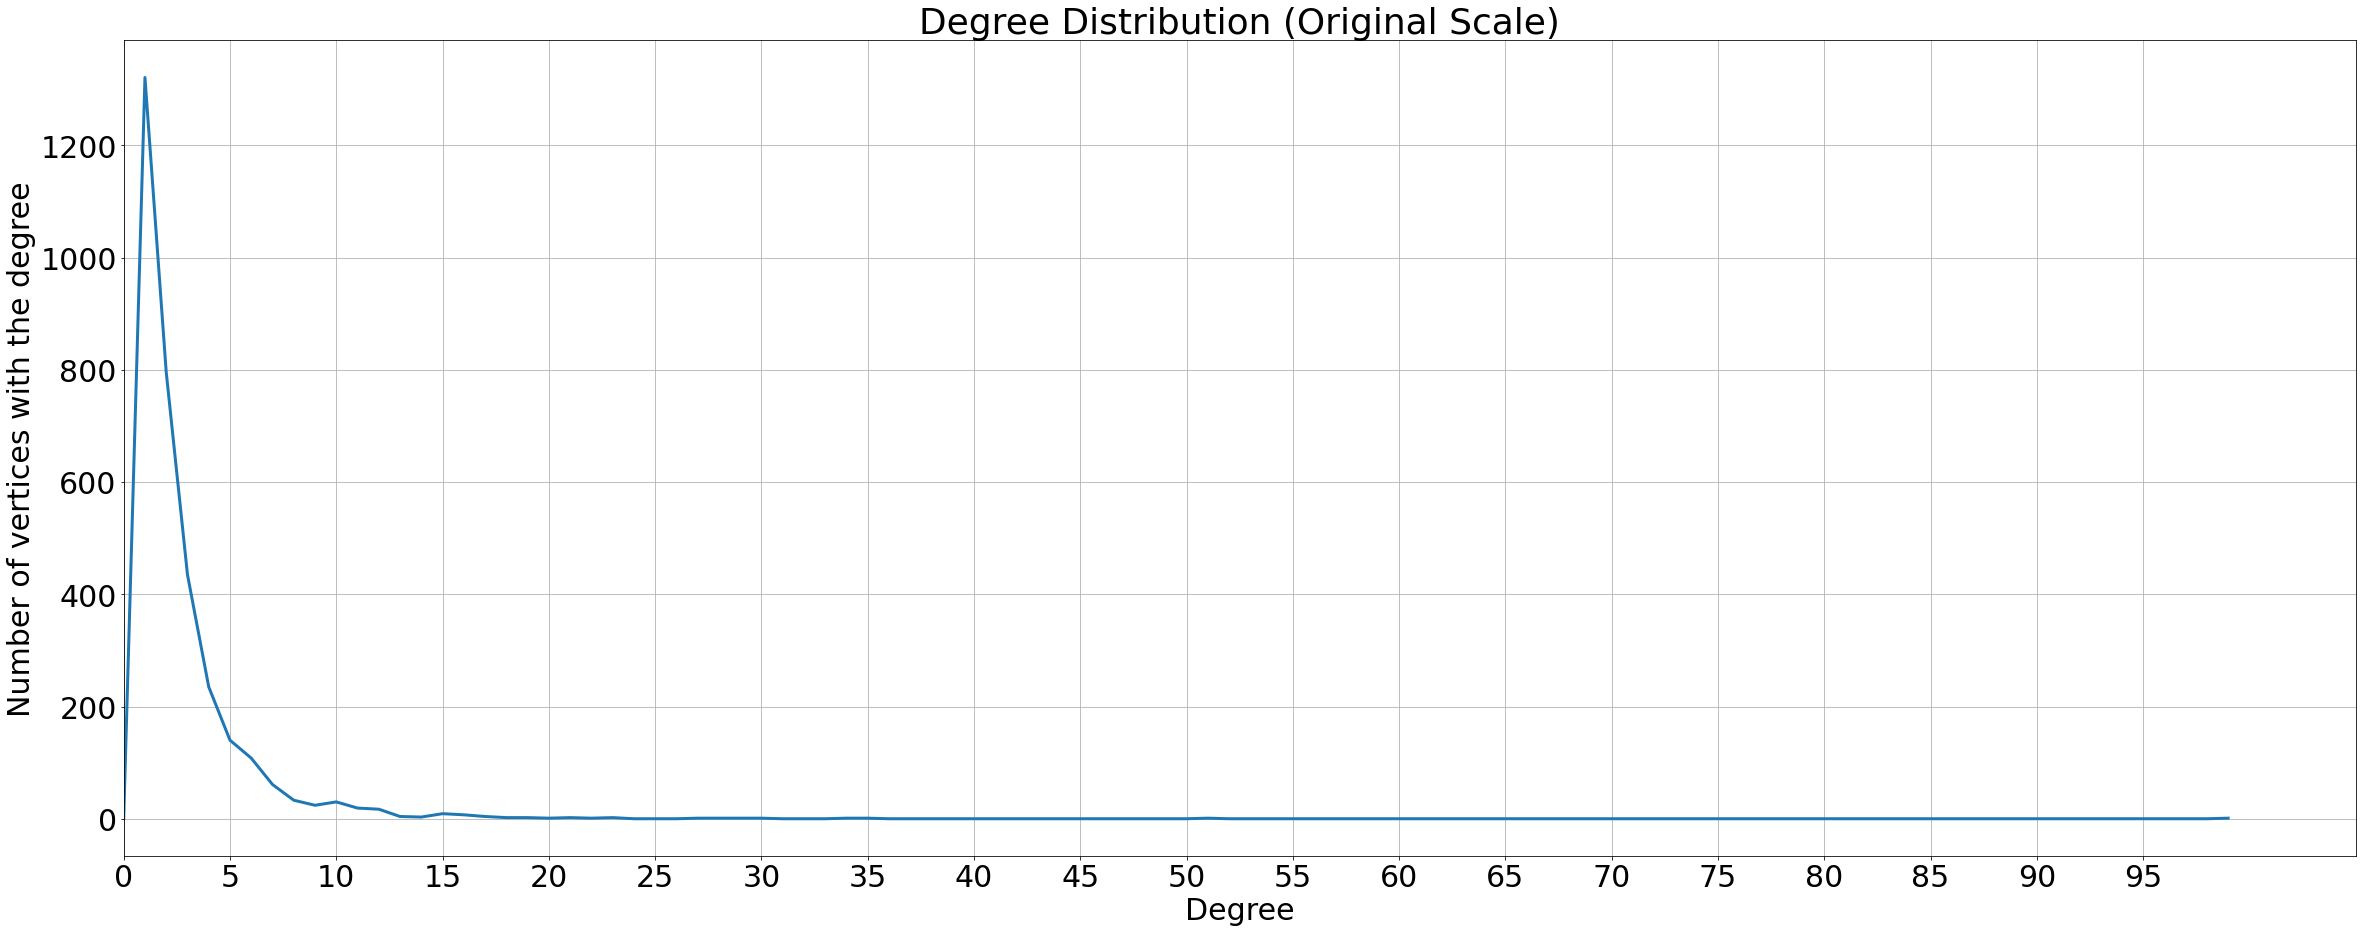

In [29]:
x = [x for x in range(max(degrees)+1)]
degree_counts = [0 for x in range(100)]

for i in degrees:
    degree_counts[i] += 1

plt.rcParams.update({'font.size': 30})
plt.figure(figsize=(40,15))
plt.plot(x, degree_counts, linewidth=3.0)
plt.ylabel('Number of vertices with the degree')
plt.xlabel('Degree')
plt.title('Degree Distribution (Original Scale)')

plt.xlim(0,105)
plt.xticks(np.arange(min(x), max(x)+1, 5.0))
plt.grid(True)
plt.savefig('degree_distribution.png')
plt.show()

Based on the distribution of nodes' degree shown above, we can find that more than 1200 nodes in the graph has only one citation, while only very few nodes in the graph have citations bigger than 20. 

### Analyses of the graphs (Visualization)

In [30]:
classes = 6

bins = [[] for x in range(classes)]

with open("citeseer.node_labels", "r") as labels_file:
    line = labels_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")
        
        vertex_id = int(strings[0])-1
        bin_id = int(strings[1])-1
        bins[bin_id].append(vertex_id)
        
        line = labels_file.readline()

In [31]:
node_colours = []

for i in range(n_vertices):
    if i in bins[0]:
        node_colours.append("pink")
    elif i in bins[1]:
        node_colours.append("yellow")
    elif i in bins[2]:
        node_colours.append("red")
    elif i in bins[3]:
        node_colours.append("blue")
    elif i in bins[4]:
        node_colours.append("orange")
    elif i in bins[5]:
        node_colours.append("green")
    else:
        node_colours.append("brown")

g.vs["color"] = node_colours

visual_style = {}

# Define colors used for outdegree visualization
# colours = ['#fecc5c', '#a31a1c']

# Set bbox and margin
visual_style["bbox"] = (3000,3000)
visual_style["margin"] = 17

# Set vertex size
visual_style["vertex_size"] = 18

# Set vertex lable size
visual_style["vertex_label_size"] = 6

# Don't curve the edges
visual_style["edge_curved"] = False

# Set the layout
my_layout = g.layout_fruchterman_reingold()
visual_style["layout"] = my_layout

# Plot the graph
plot(g, "graph_visualization.eps", **visual_style)

As you can see, in CiteSeer there are many small subgraphs (as shown in the periphery of the network) while some very large communities (as shown in the middleof the network). The majority of small subgraphs tend to have same label, as almost all nodes share the same color. Large subgraphs usually have different colors for their nodes.

### Subgraph Analysis

Here is a quick example to show one subgraph (induced by the pink nodes)

In [39]:
with open("citeseer.node_labels", "r") as labels_file:
    line = labels_file.readline()
    
    while line != "":
        
        strings = line.rstrip().split(",")
        
        vertex_id = int(strings[0])-1
        
        G.nodes[vertex_id]["label"] = strings[1]
        
        line = labels_file.readline()
        
node_label = [x for x,y in G.nodes(data=True) if y['label']=='1']
G_sub = G.subgraph(node_label)

In [55]:
from pyvis.network import Network

In [56]:
nt = Network("500px", "500px")
nt.from_nx(G_sub)
nt.show("nx.html")

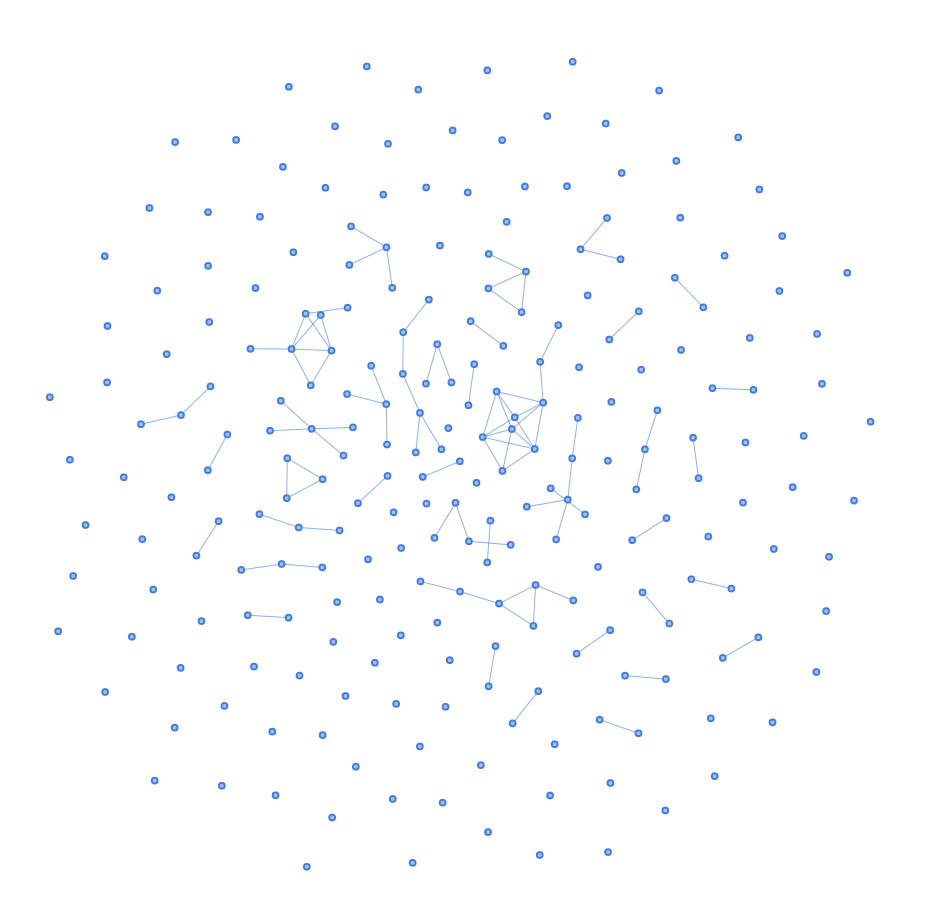

In [63]:
from IPython.display import Image
Image(filename='G_sub.PNG')

As you can see here, this subgraph is very sparse with very limited number of edges, which coincides with the observation of pink nodes in the visualization of the whole graph. Hence, this type of paper have relatively fewer number of citations between themselves.

## Future Study

There are many more advanced properties of the CiteSeer graph that I haven't explored in this project due to my limited knowledge and time. For example, if I later learn Graph Neural Network then I am probably be able to use GNN to build some algorithms and find more properties of the graph.